In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [159]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# download spark
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
# extracting spark file
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark_dist_explore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Setting up the home environment
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [4]:
!ls

drive			       spark-3.1.1-bin-hadoop3.2.tgz.1
sample_data		       spark-3.1.1-bin-hadoop3.2.tgz.2
spark-3.1.1-bin-hadoop3.2      spark-3.1.1-bin-hadoop3.2.tgz.3
spark-3.1.1-bin-hadoop3.2.tgz


In [44]:
# import sparksession
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
from pyspark.sql.functions import col,count,when
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
from pyspark.sql.functions import size
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType
import pyspark.sql.functions as F
spark

In [6]:
#data analysis libraries
import numpy as np
import pandas as pd
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
# df=pd.read_csv('/content/drive/MyDrive/songs_dataset.csv')

In [8]:
spark = SparkSession.builder.appName("CSV_Formatting").getOrCreate()

In [9]:
# load the data with the formatted output
# df = spark.read.format("csv").option("header", "true").load('/content/drive/MyDrive/songs_dataset.csv')
df=spark.read.csv('/content/drive/MyDrive/songs_dataset.csv',inferSchema=True,header=True)
# df=spark.read.csv('/content/drive/MyDrive/data.csv',inferSchema=True,header=True)
df.show(5)

+---+--------------------+--------------------+------------+-----+--------------------+---+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+----------+---+
|_c0|         artist_name|          track_name|release_date|genre|              lyrics|len|              dating|            violence|          world/life|          night/time|  shake the audience|       family/gospel|            romantic|       communication|             obscene|               music|     movement/places|light/visual perceptions|    family/spiritual|          like/girls|             sadness|            feelings| 

In [10]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- artist_name: string (nullable = true)
 |-- track_name: string (nullable = true)
 |-- release_date: integer (nullable = true)
 |-- genre: string (nullable = true)
 |-- lyrics: string (nullable = true)
 |-- len: integer (nullable = true)
 |-- dating: double (nullable = true)
 |-- violence: double (nullable = true)
 |-- world/life: double (nullable = true)
 |-- night/time: double (nullable = true)
 |-- shake the audience: double (nullable = true)
 |-- family/gospel: double (nullable = true)
 |-- romantic: double (nullable = true)
 |-- communication: double (nullable = true)
 |-- obscene: double (nullable = true)
 |-- music: double (nullable = true)
 |-- movement/places: double (nullable = true)
 |-- light/visual perceptions: double (nullable = true)
 |-- family/spiritual: double (nullable = true)
 |-- like/girls: double (nullable = true)
 |-- sadness: double (nullable = true)
 |-- feelings: double (nullable = true)
 |-- danceability: double (n

In [11]:
df.limit(5)

_c0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel br...,95,5.98086126288938E-4,0.06374612761149936,5.980861568711991E-4,5.980861851733603E-4,5.980861274492461E-4,0.04885701521695907,0.0171043388602836,0.2637508813174463,5.980861613241781E-4,0.03928836592552566,5.980861922640663E-4,5.980861380272807E-4,5.980861261369507E-4,5.980861796080522E-4,0.380298895230333,0.11717545142309628,0.35773854651792486,0.45411891392969767,0.9979919658553876,0.9018218623481781,0.33944765045342123,0.13711018802589228,sadness,1.0
4,frankie laine,i believe,1950,pop,believe drop rain...,51,0.0355371338259024,0.09677674227829695,0.44343517381864045,0.001283697113893...,0.001283697054027...,0.02700747737752981,0.001283697149879...,0.001283697122283...,0.001283697114412...,0.11803384116823598,0.001283697092589732,0.2126810671851602,0.05112419901776462,0.001283697056361...,0.001283697130026...,0.001283697175168...,0.33174482833315283,0.64753993282568,0.9548192317462166,1.528340080971659...,0.3250206100577081,0.2632402533492537,world/life,1.0
6,johnnie ray,cry,1950,pop,sweetheart send l...,24,0.002770083112964...,0.002770083216950...,0.002770083338284...,0.002770083310265701,0.002770083105133...,0.00277008314953857,0.15856446565813143,0.25066790992061416,0.002770083254843025,0.3237940521915833,0.002770083466243...,0.002770083321430...,0.002770083291967...,0.002770083513581458,0.002770083190828636,0.22542232330826406,0.45629806130185213,0.585288311155552,0.8403612855032989,0.0,0.35181368507831823,0.13911225255483453,music,1.0
10,pérez prado,patricia,1950,pop,kiss lips want st...,54,0.04824912378369902,0.001547987647649...,0.001547987736006...,0.001547987822572...,0.021500355476212204,0.001547987658152495,0.41153582463430627,0.001547987749586...,0.001547987713396...,0.001547987673344...,0.1292497848687442,0.001547987722954...,0.001547987649057...,0.0811317603482602,0.22588948422032734,0.001547987619397...,0.6869923101917037,0.7444042765941081,0.08393482322773417,0.19939271255060728,0.7753503709810387,0.7437357402953926,romantic,1.0
12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till...,48,0.001349527698357...,0.001349527710717...,0.4177722727138843,0.001349527769804...,0.001349527675244...,0.001349527706827...,0.46343009486128023,0.001349527805997...,0.001349527691256...,0.001349527677136...,0.001349527712799...,0.001349527797172...,0.029754565101290716,0.001349527684528...,0.06880015162837107,0.001349527670906...,0.2916711794649627,0.6464887316360279,0.9759035902646489,2.459514170040486E-4,0.597073371805441,0.3943754799949707,romantic,1.0


In [12]:
df.columns

['_c0',
 'artist_name',
 'track_name',
 'release_date',
 'genre',
 'lyrics',
 'len',
 'dating',
 'violence',
 'world/life',
 'night/time',
 'shake the audience',
 'family/gospel',
 'romantic',
 'communication',
 'obscene',
 'music',
 'movement/places',
 'light/visual perceptions',
 'family/spiritual',
 'like/girls',
 'sadness',
 'feelings',
 'danceability',
 'loudness',
 'acousticness',
 'instrumentalness',
 'valence',
 'energy',
 'topic',
 'age']

In [13]:
print('the number of columns in the above data set are',len(df.columns))

the number of columns in the above data set are 31


In [14]:
# finding the null values in the dataset columns
display(df.select([count(when(col(i).isNull(),i)).alias(i) for i in df.columns]))

_c0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
df.describe().show()

+-------+------------------+--------------------+-----------------+------------------+-----+-----------------------------------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+-------------------+-------------------+-------------------+----------+--------------------+
|summary|               _c0|         artist_name|       track_name|      release_date|genre|                             lyrics|               len|              dating|            violence|          world/life|          night/time|  shake the audience|       family/gospel|            romantic|       communication|             obscene|               music| 

In [16]:
# assigning the dataset to the new variable for cleaning the dataset
clean_data=df

In [17]:
clean_data=clean_data.drop('lyrics','age')

In [18]:
clean_data.describe().show()

+-------+------------------+--------------------+-----------------+------------------+-----+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+-------------------+-------------------+-------------------+----------+
|summary|               _c0|         artist_name|       track_name|      release_date|genre|               len|              dating|            violence|          world/life|          night/time|  shake the audience|       family/gospel|            romantic|       communication|             obscene|               music|     movement/places|light/visual perceptions|    family/spiritual|          like/girls|      

In [19]:
num_rows = df.count()  # Number of rows
num_cols = len(df.columns)  # Number of columns

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 28372
Number of columns: 31


In [20]:
column_names = clean_data.columns

In [21]:
# check for duplicate date\
duplicate_rows = clean_data.dropDuplicates()
has_duplicates = duplicate_rows.count() > clean_data.count()

if has_duplicates:
    print("There are duplicate rows in the dataset.")
else:
    print("There are no duplicate rows in the dataset")

There are no duplicate rows in the dataset


In [22]:
clean_data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- artist_name: string (nullable = true)
 |-- track_name: string (nullable = true)
 |-- release_date: integer (nullable = true)
 |-- genre: string (nullable = true)
 |-- len: integer (nullable = true)
 |-- dating: double (nullable = true)
 |-- violence: double (nullable = true)
 |-- world/life: double (nullable = true)
 |-- night/time: double (nullable = true)
 |-- shake the audience: double (nullable = true)
 |-- family/gospel: double (nullable = true)
 |-- romantic: double (nullable = true)
 |-- communication: double (nullable = true)
 |-- obscene: double (nullable = true)
 |-- music: double (nullable = true)
 |-- movement/places: double (nullable = true)
 |-- light/visual perceptions: double (nullable = true)
 |-- family/spiritual: double (nullable = true)
 |-- like/girls: double (nullable = true)
 |-- sadness: double (nullable = true)
 |-- feelings: double (nullable = true)
 |-- danceability: double (nullable = true)
 |-- loudness: double 

In [23]:
print('--------------------this measure the minimum and maximum range present in a column---------------')

# variations of age
year_range = clean_data.selectExpr("min(release_date)", "max(release_date)").first()
print('years=>',str(year_range[0]) + " - " + str(year_range[1]))

# Calculate the range for the "acousticness" column
acousticness_range = clean_data.selectExpr("min(acousticness)", "max(acousticness)").first()
print('acousticness_range=>',str(acousticness_range[0]) + " - " + str(acousticness_range[1]))

# Calculate the range for the "danceability" column
danceability_range = clean_data.selectExpr("min(danceability)", "max(danceability)").first()
print('danceability_range=>',str(danceability_range[0]) + " - " + str(danceability_range[1]))

# Calculate the range for the "energy" column
energy_range = clean_data.selectExpr("min(energy)", "max(energy)").first()
print('energy_range=>',str(energy_range[0]) + " - " + str(energy_range[1]))

# Calculate the range for the "instrumentalness" column
instrumentalness_range = clean_data.selectExpr("min(instrumentalness)", "max(instrumentalness)").first()
print('instrumentalness_range=>',str(instrumentalness_range[0]) + " - " + str(instrumentalness_range[1]))

# Calculate the range for the "speechiness" column
communication_range = clean_data.selectExpr("min(communication)", "max(communication)").first()
print('communication_range=>',str(communication_range[0]) + " - " + str(communication_range[1]))

# Calculate the range for the "valence" column
valence_range = clean_data.selectExpr("min(valence)", "max(valence)").first()
print('valence_range=>',str(valence_range[0]) + " - " + str(valence_range[1]))



--------------------this measure the minimum and maximum range present in a column---------------
years=> 1950 - 2019
acousticness_range=> 2.811247802457635e-07 - 1.0
danceability_range=> 0.005415357955160835 - 0.9935015704538073
energy_range=> 0.0 - 1.0
instrumentalness_range=> 0.0 - 0.9969635627530364
communication_range=> 0.0002907822160555193 - 0.6458293721065843
valence_range=> 0.0 - 1.0


In [24]:
duplicate_rows = clean_data.dropDuplicates()
has_duplicates = duplicate_rows.count() > clean_data.count()

if has_duplicates:
    print("There are duplicate rows in the dataset.")
else:
    print("There are no duplicate rows in the dataset.")

There are no duplicate rows in the dataset.


**data visulization**

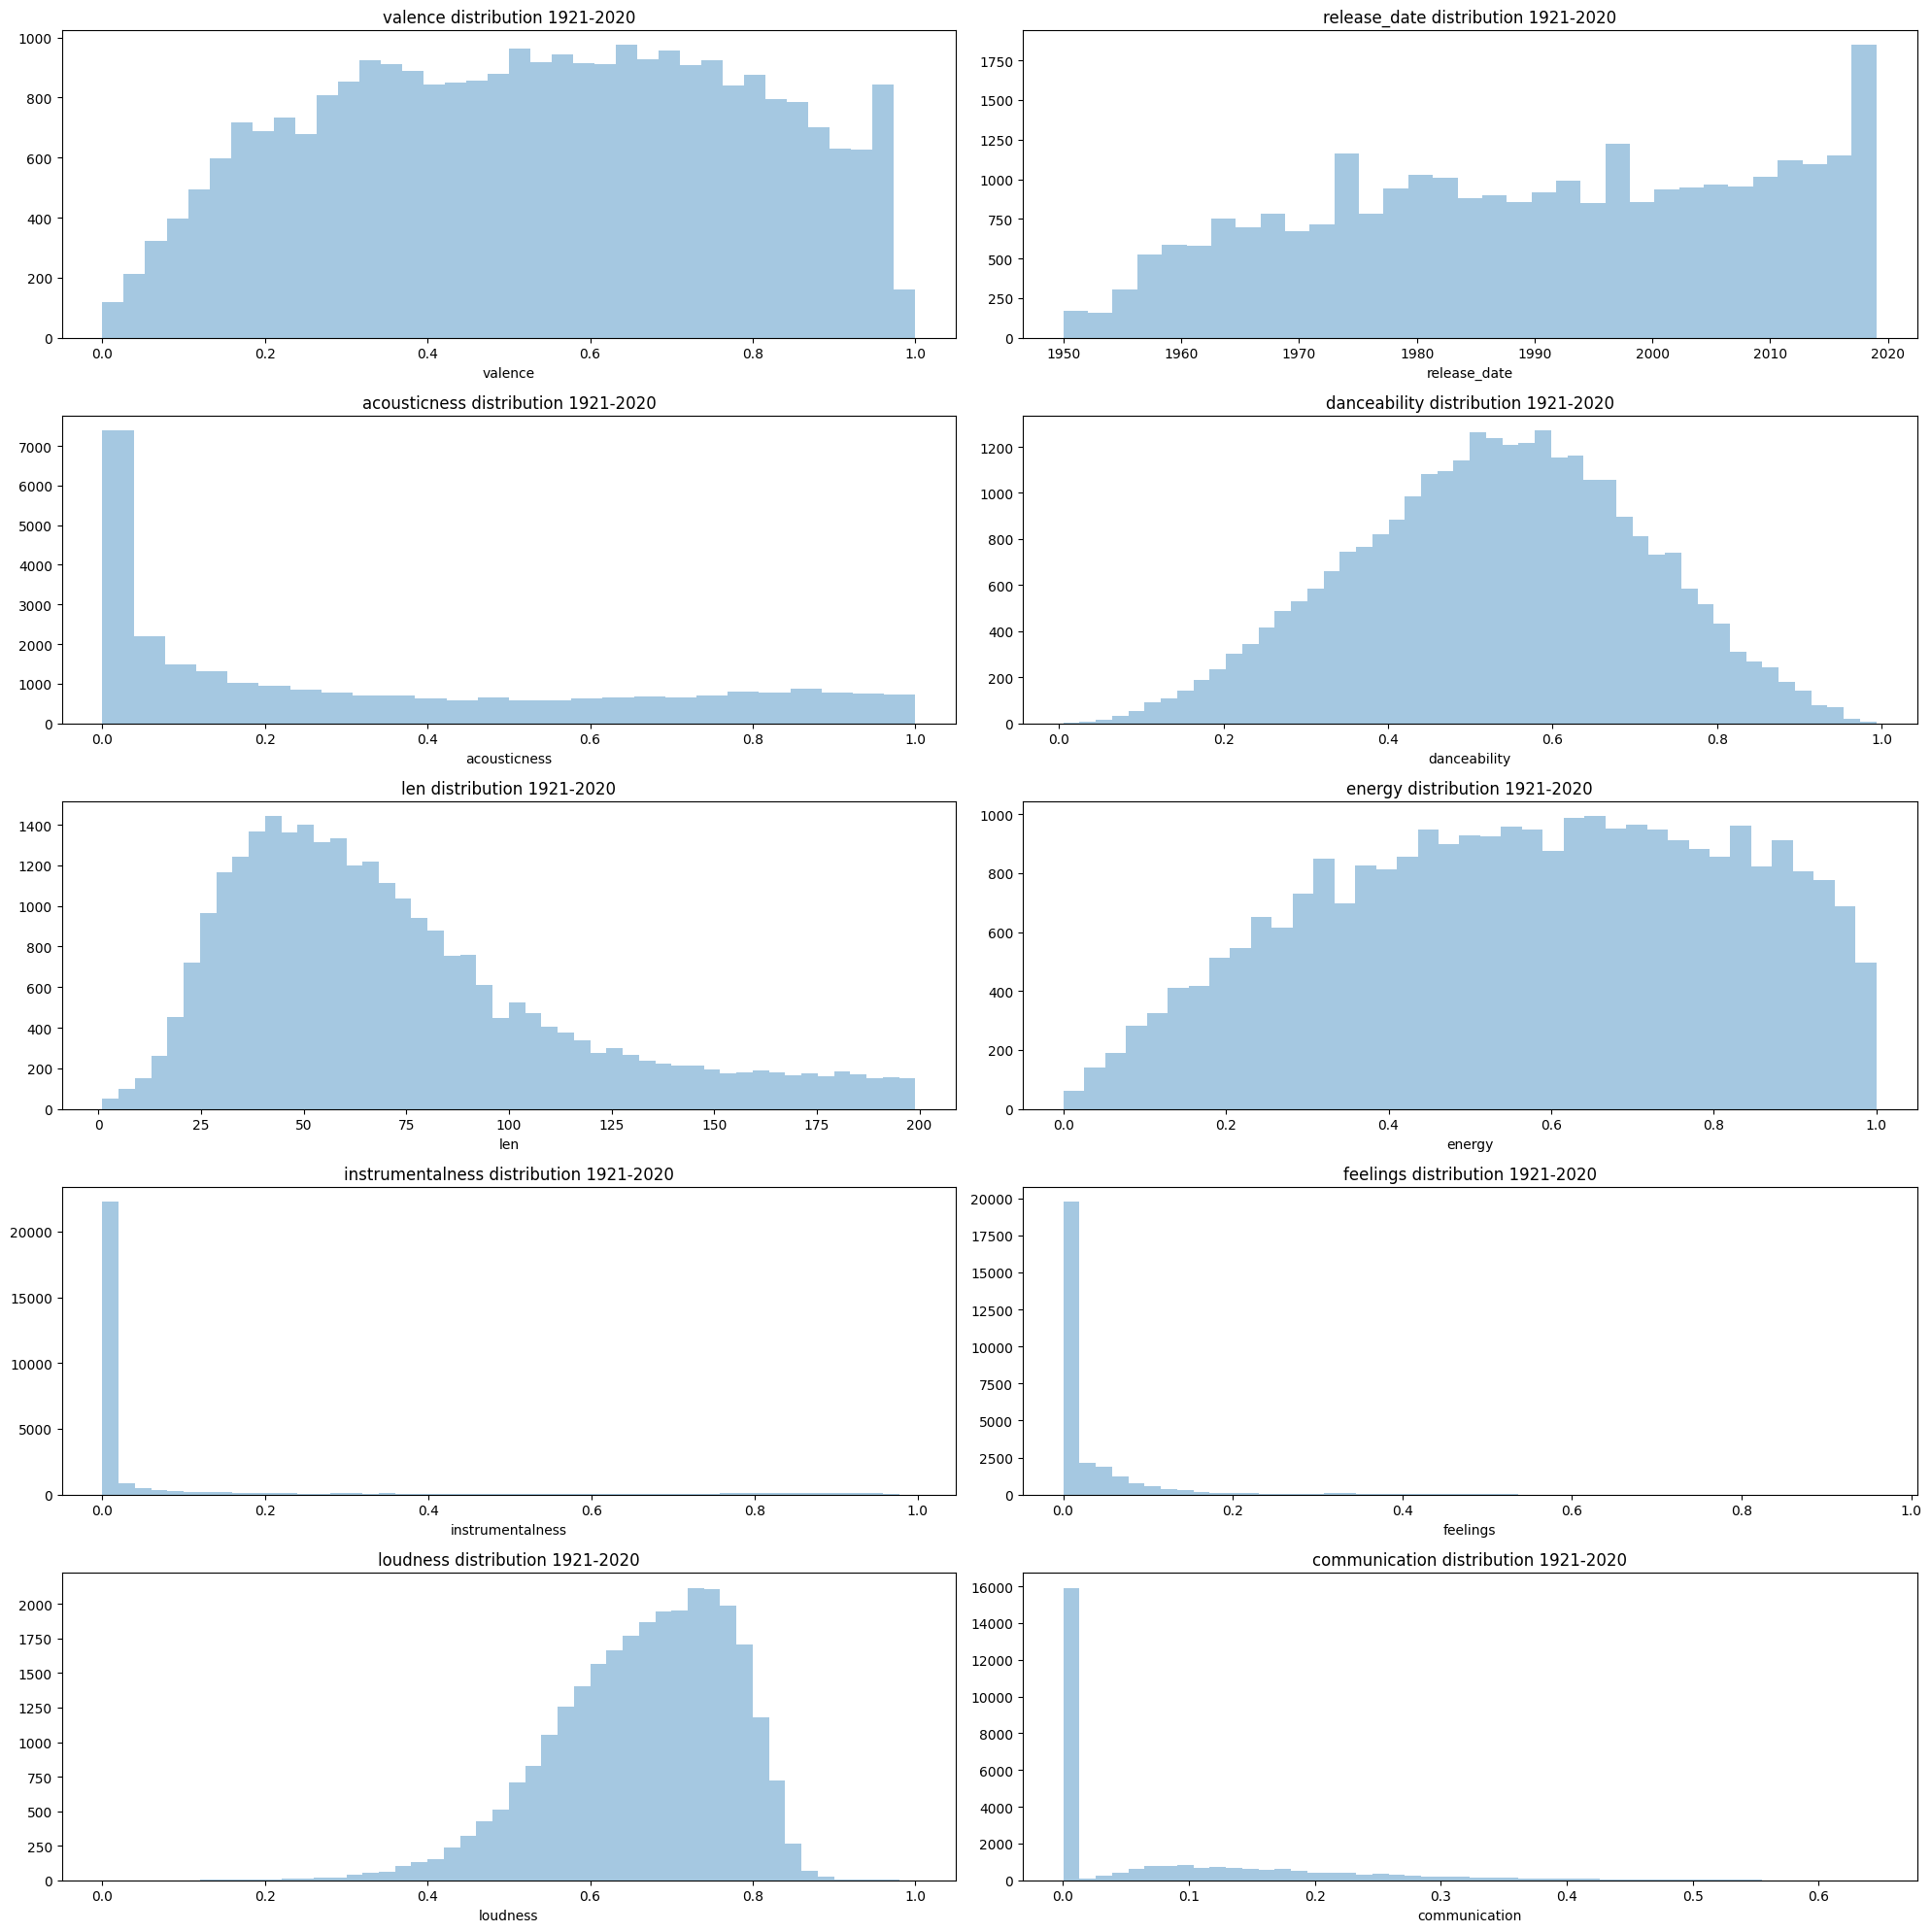

In [122]:
plt.figure(figsize=(20, 20))
count = 1
xy_columns = ['valence', 'release_date', 'acousticness', 'danceability', 'len', 'energy', 'instrumentalness', 'feelings', 'loudness', 'communication']
x_columns = ['valence', 'release_date', 'acousticness', 'danceability', 'len', 'energy', 'instrumentalness', 'feelings', 'loudness', 'communication']
pandas_df = clean_data.toPandas()
num_plots = len(xy_columns)

# Calculate the number of subplot rows and columns
num_rows = (num_plots + 1) // 2  # Add 1 to handle odd number of plots
num_cols = 2

for xvar in xy_columns:
  plt.subplot(num_rows, num_cols, count)
  count += 1
  plt.gca().set_title(xvar + ' distribution 1921-2020')
  sns.distplot(a=pandas_df[xvar], kde=False)
  
plt.tight_layout()
plt.show()


+--------------------+-------+-----+
|         artist_name|  genre|count|
+--------------------+-------+-----+
|     harry belafonte|    pop|   18|
|       shaun cassidy|    pop|    2|
|        quarterflash|    pop|    3|
|       cocteau twins|    pop|   22|
|            m people|    pop|    1|
|         frank black|    pop|    1|
|           relient k|    pop|    1|
|              fergie|    pop|    2|
|                wale|    pop|    3|
|          beta radio|    pop|    1|
|              j boog|    pop|    1|
|          famous dex|    pop|    2|
|    maggie lindemann|    pop|    1|
|the allman brothe...|country|    9|
|       the mavericks|country|   15|
|        jason aldean|country|   23|
|            latimore|  blues|    1|
|         bob log iii|  blues|    1|
|         renaissance|   jazz|   11|
|       benny berigan|   jazz|    1|
+--------------------+-------+-----+
only showing top 20 rows



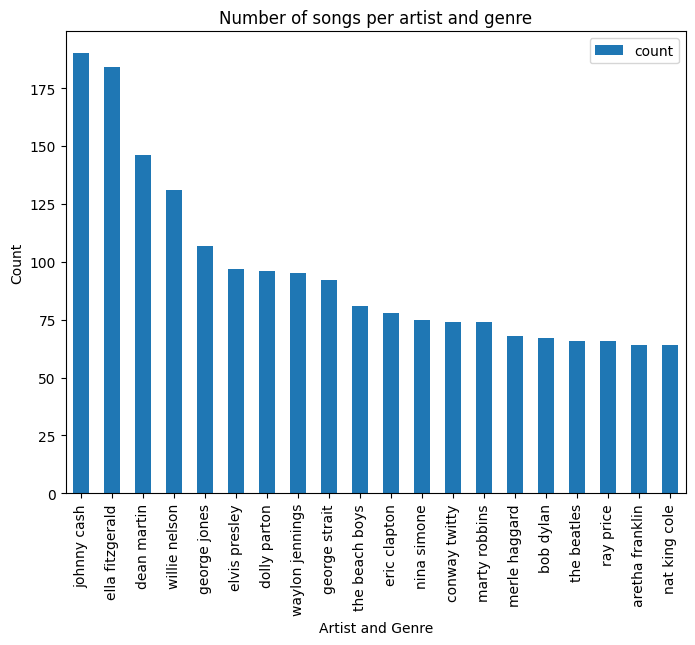

In [25]:

# Group the data by artist and genre, and count the number of events for each group
artist_genre_counts = df.groupBy('artist_name', 'genre').agg(count('*').alias('count'))
artist_genre_counts.show()
genre_counts_pd = artist_genre_counts.toPandas()
top_20_artists = genre_counts_pd.nlargest(20, 'count')
fig, ax = plt.subplots(figsize=(8,6))
top_20_artists.plot(kind='bar', x='artist_name', y='count',ax=ax)
ax.set_title('Number of songs per artist and genre')
ax.set_xlabel('Artist and Genre')
ax.set_ylabel('Count')
plt.show()

In [26]:
import matplotlib.pyplot as plt

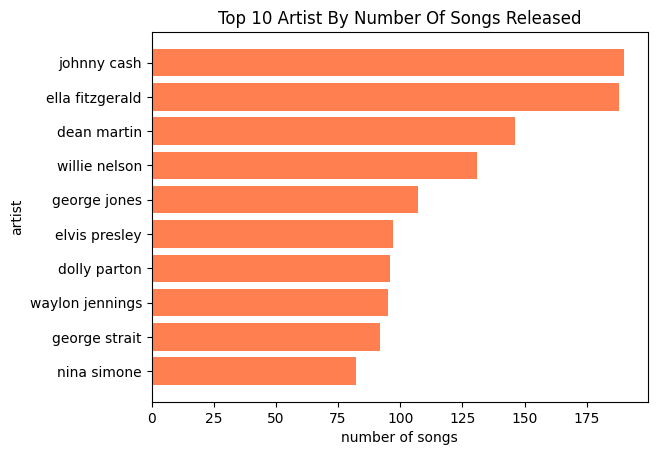

In [27]:
clean_data_to_pandas=clean_data.toPandas()
publisher_counts = clean_data_to_pandas.groupby('artist_name')['release_date'].count()
top_publishers = publisher_counts.sort_values(ascending=False)[:10]
top_publishers = top_publishers.iloc[::-1]
plt.barh(top_publishers.index, top_publishers.values,color='coral')
plt.title('Top 10 Artist By Number Of Songs Released')
plt.xlabel('number of songs')
plt.ylabel('artist')
plt.show()

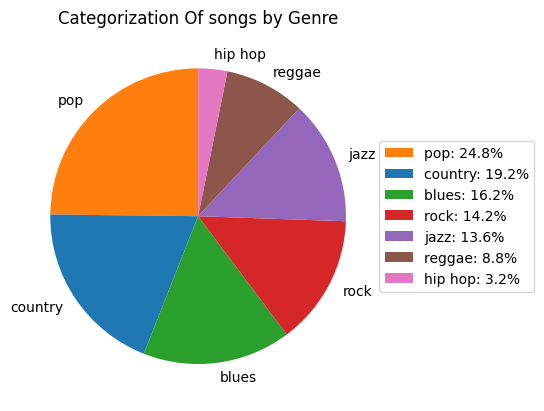

In [28]:
songsGenre=clean_data_to_pandas
import matplotlib.pyplot as plt
# group books by language code and count the number of books in each language
songsGenre = clean_data.groupBy('genre').agg(F.count('release_date').alias('count')).orderBy('count', ascending=False)

# collect the results to the driver node and convert PySpark DataFrame to Pandas DataFrame
songsGenre = songsGenre.toPandas()

# set the colors for the pie chart
colors = ['tab:orange', 'tab:blue', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'gray', 'slateblue', 'darksalmon', 'seagreen', 'tan', 'lightblue', 'plum', 'coral', 'indigo', 'magenta', 'lime']

# create pie chart with language counts and corresponding colors
plt.pie(songsGenre['count'], labels=songsGenre['genre'], colors=colors, autopct='', startangle=90)

# create legend with language codes and percentages
plt.legend(labels=[f"{code}: {count/sum(songsGenre['count'])*100:.1f}%" for code, count in zip(songsGenre['genre'], songsGenre['count'])], bbox_to_anchor=(1.2, 0.5), loc='center')

# set title
plt.title('Categorization Of songs by Genre')

# show plot
plt.show()


<h1>Evolution of music through the year </h1>

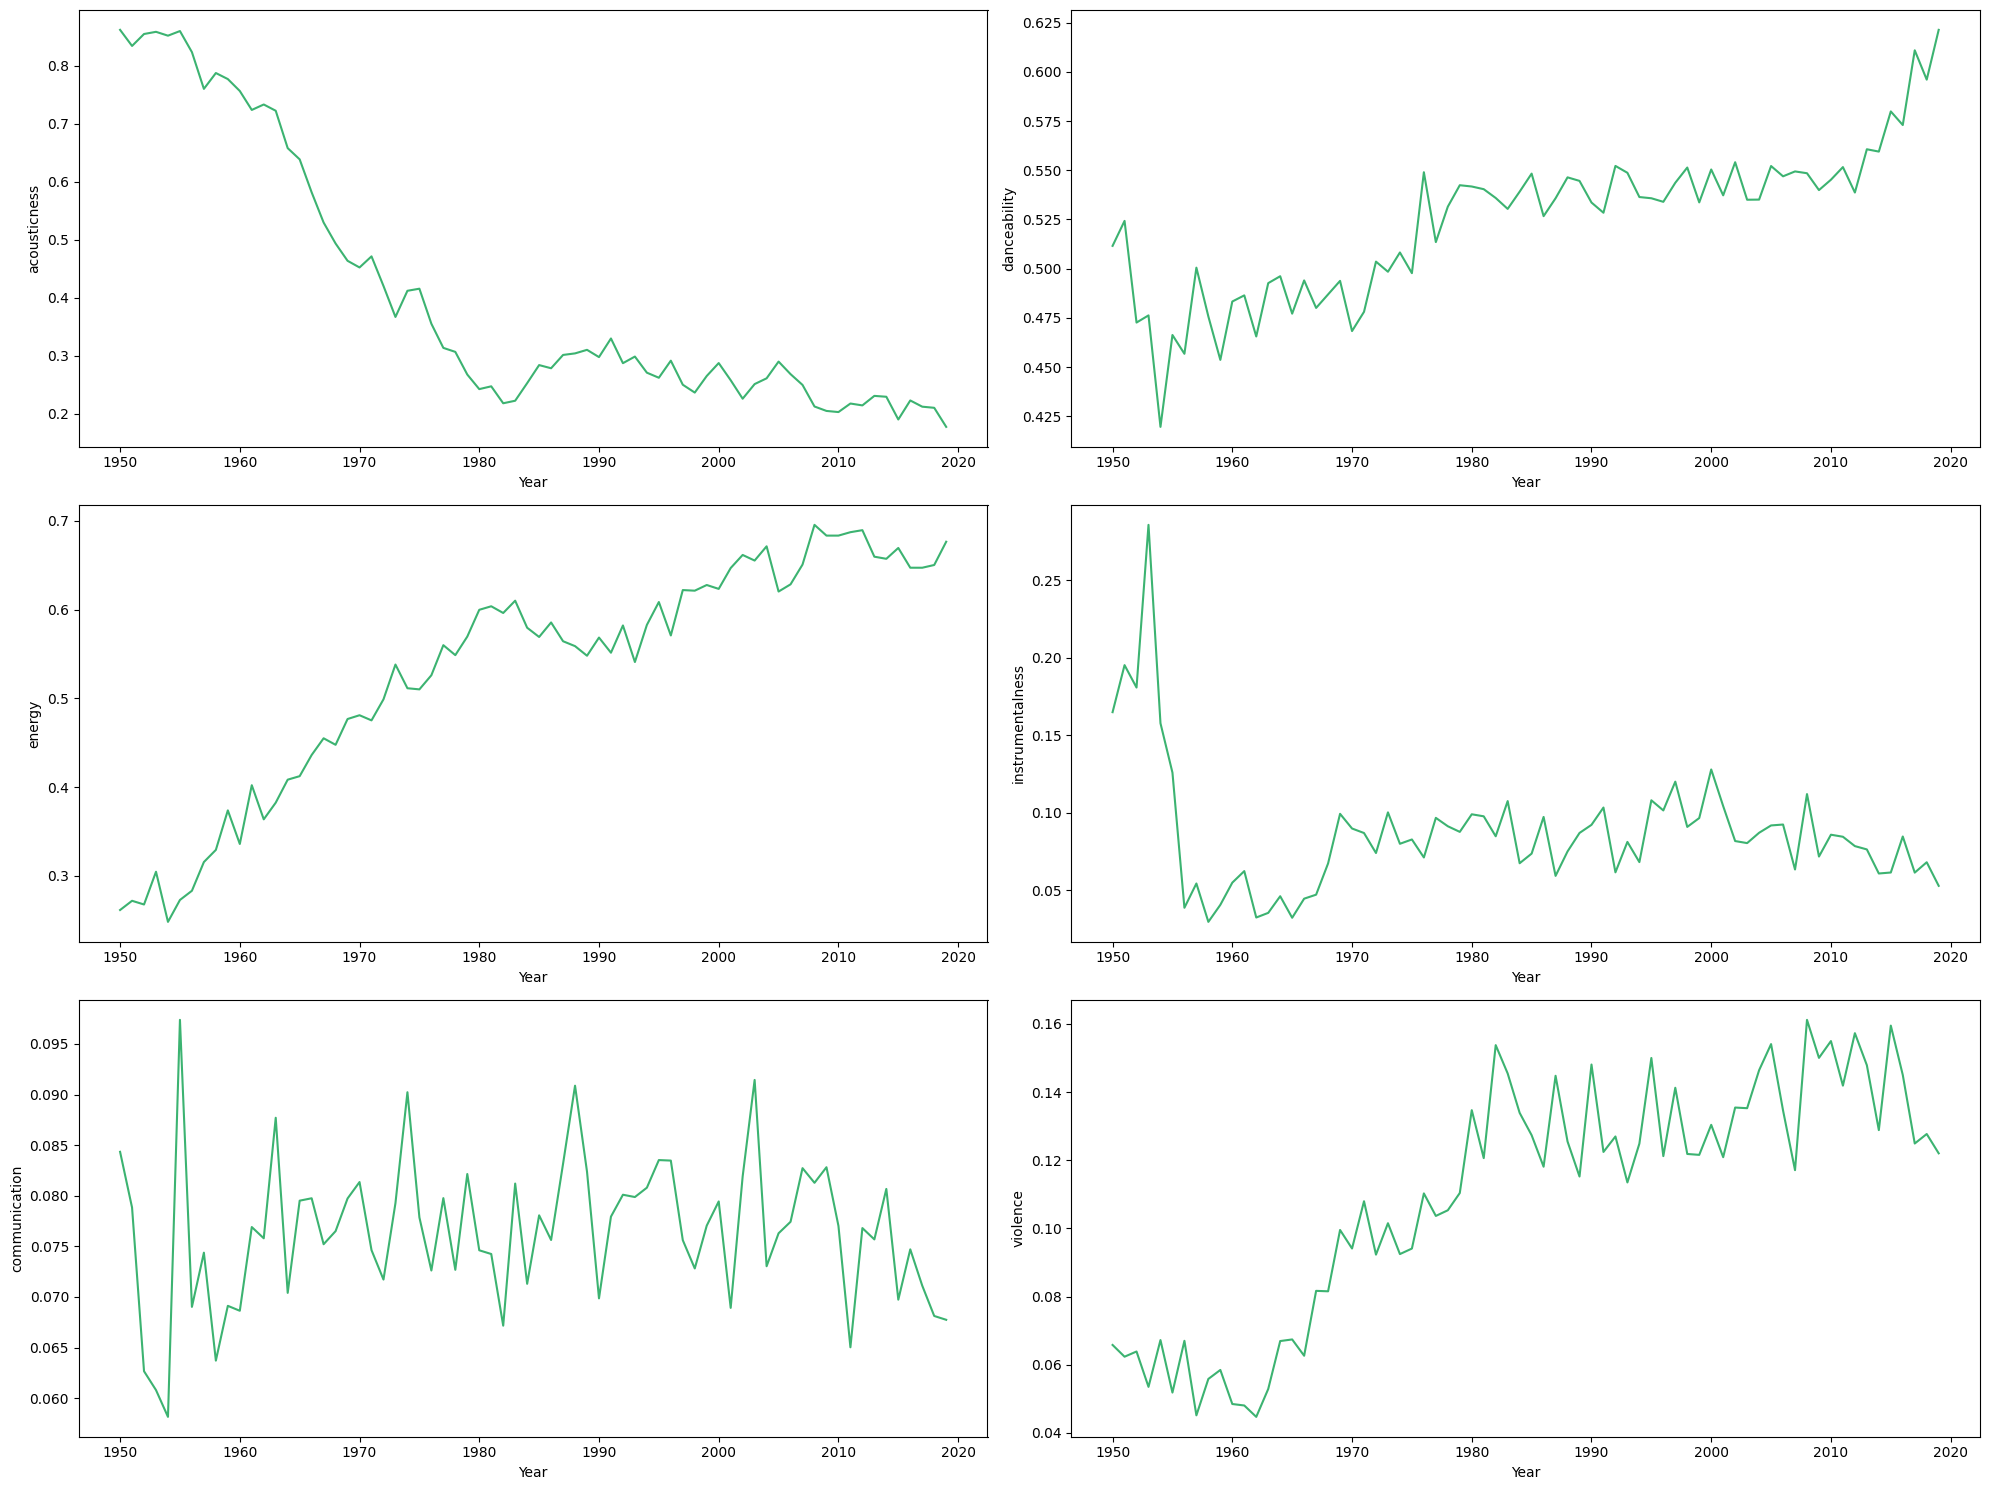

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = clean_data.toPandas()

# Define the musical elements
arrElements = ["acousticness", "danceability", "energy", "instrumentalness", "communication",'violence']

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 15))

# Initialize row and column counters
row = 0
col = 0

# Iterate over the musical elements and plot line graphs
for elem in arrElements:
    # Group rows by year and calculate the mean value for the musical element
    grouped_df = pandas_df.groupby("release_date")[elem].mean()

    # Plot the line graph on the corresponding subplot
    axes[row, col].plot(grouped_df.index, grouped_df.values, color="mediumseagreen")
    axes[row, col].set_xlabel("Year")
    axes[row, col].set_ylabel(elem)

    # Update row and column counters
    if col == 0:
        col = 1
    elif row == 0 and col == 1:
        row = 1
        col = 0
    elif row == 1 and col == 1:
        row = 2
        col = 0

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

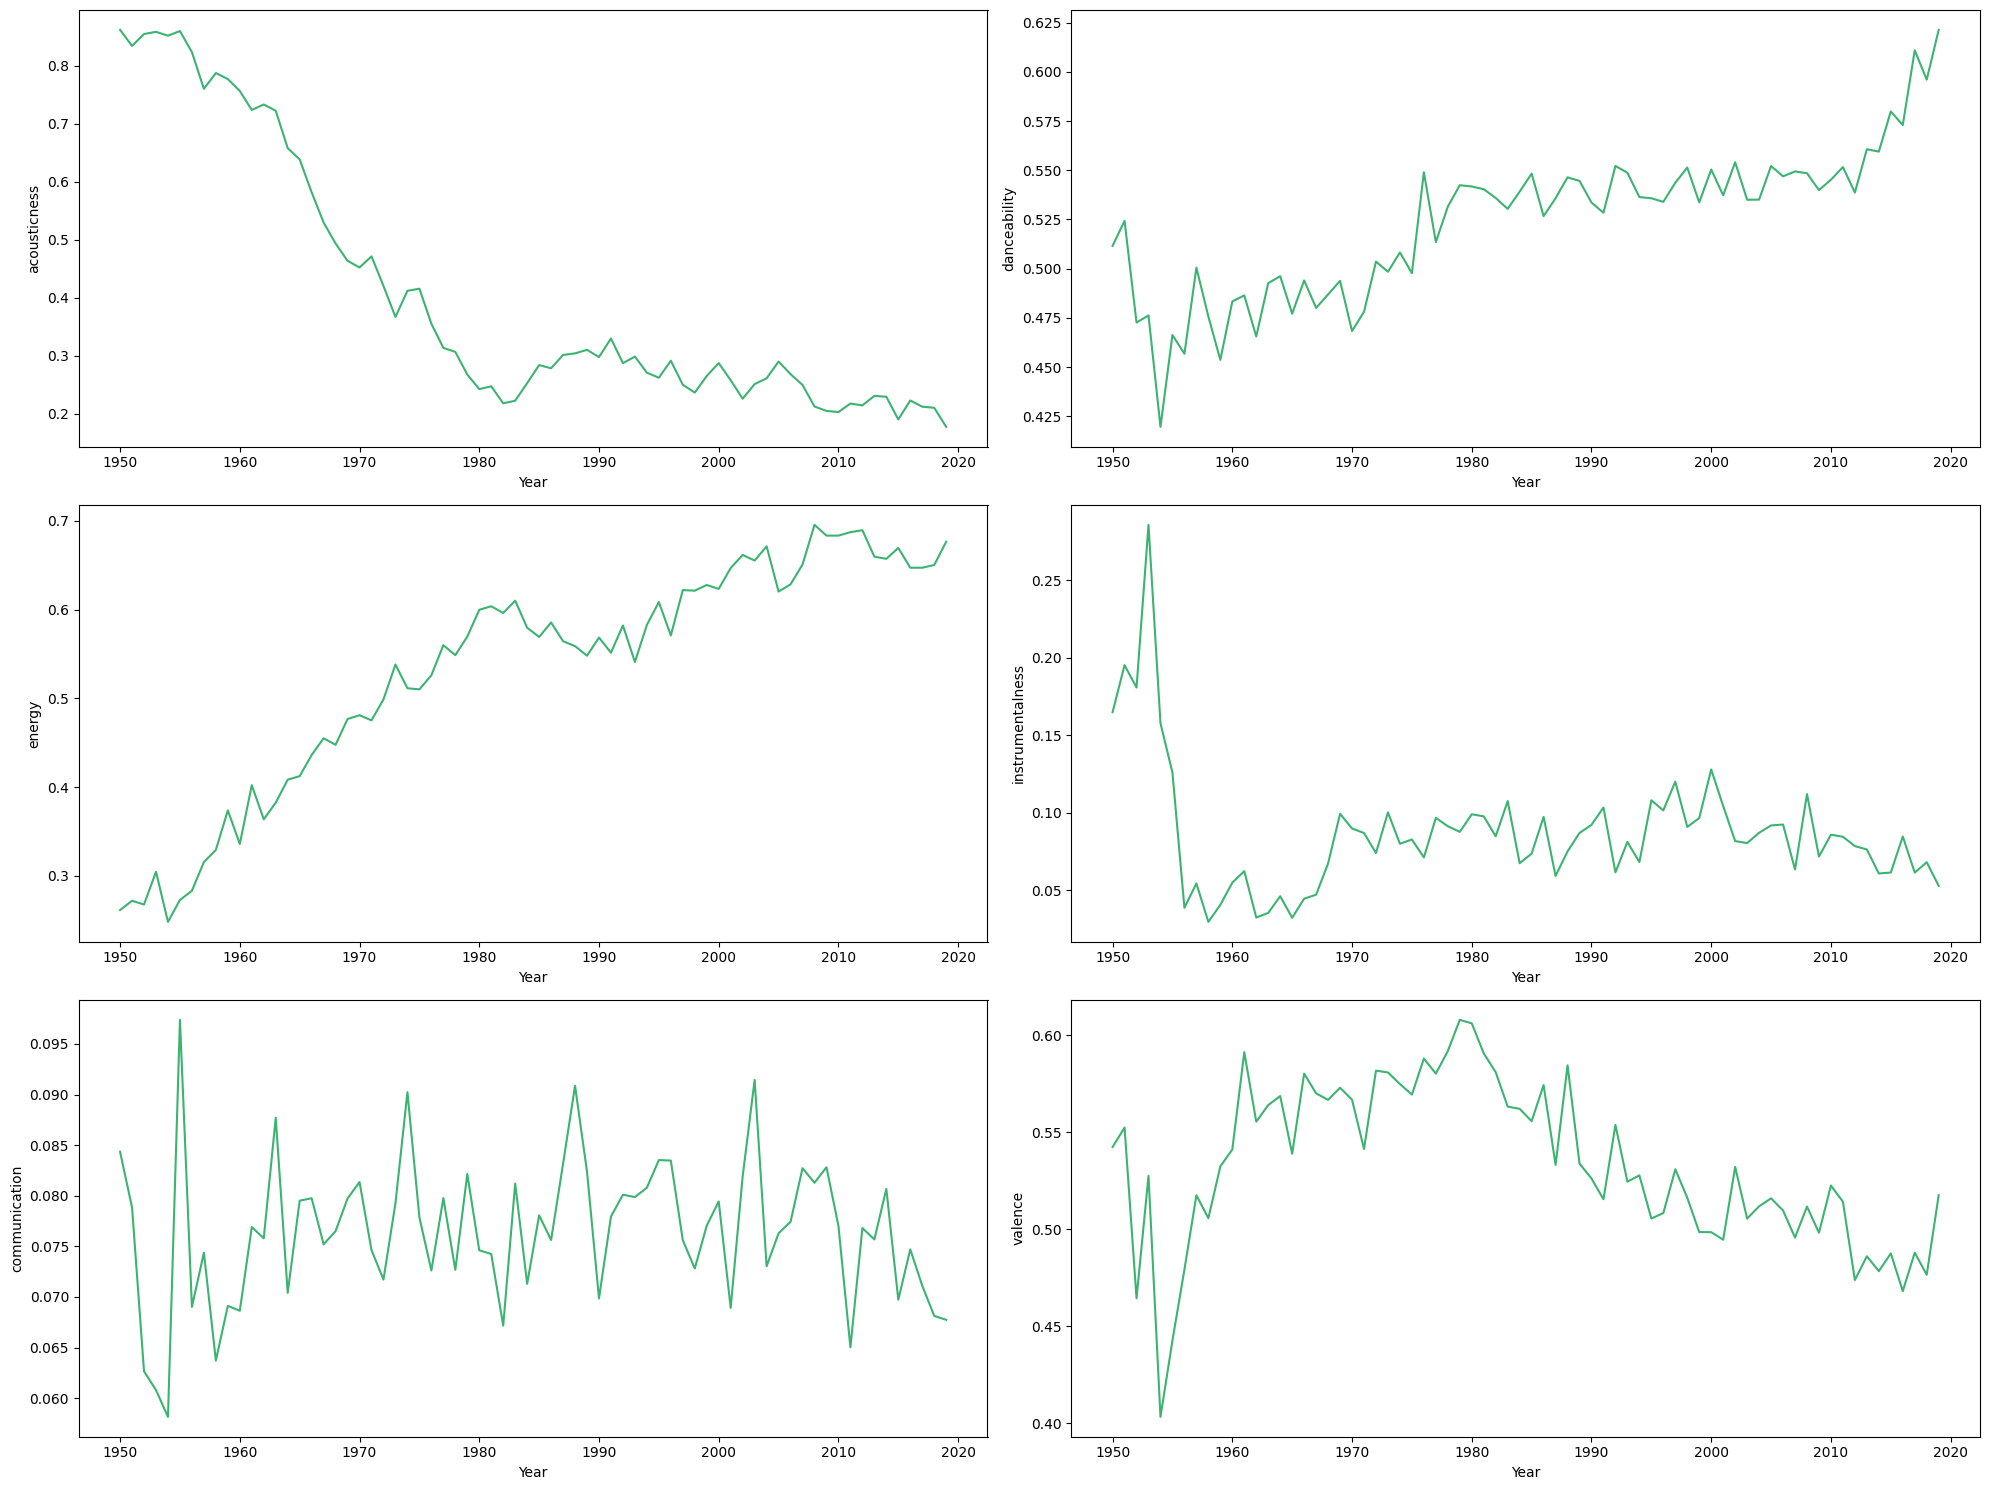

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = clean_data.toPandas()

# Define the musical elements
arrElements = ["acousticness", "danceability", "energy", "instrumentalness", "communication",'valence']

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 15))

# Initialize row and column counters
row = 0
col = 0

# Iterate over the musical elements and plot line graphs
for elem in arrElements:
    # Group rows by year and calculate the mean value for the musical element
    grouped_df = pandas_df.groupby("release_date")[elem].mean()

    # Plot the line graph on the corresponding subplot
    axes[row, col].plot(grouped_df.index, grouped_df.values, color="mediumseagreen")
    axes[row, col].set_xlabel("Year")
    axes[row, col].set_ylabel(elem)

    # Update row and column counters
    if col == 0:
        col = 1
    elif row == 0 and col == 1:
        row = 1
        col = 0
    elif row == 1 and col == 1:
        row = 2
        col = 0

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

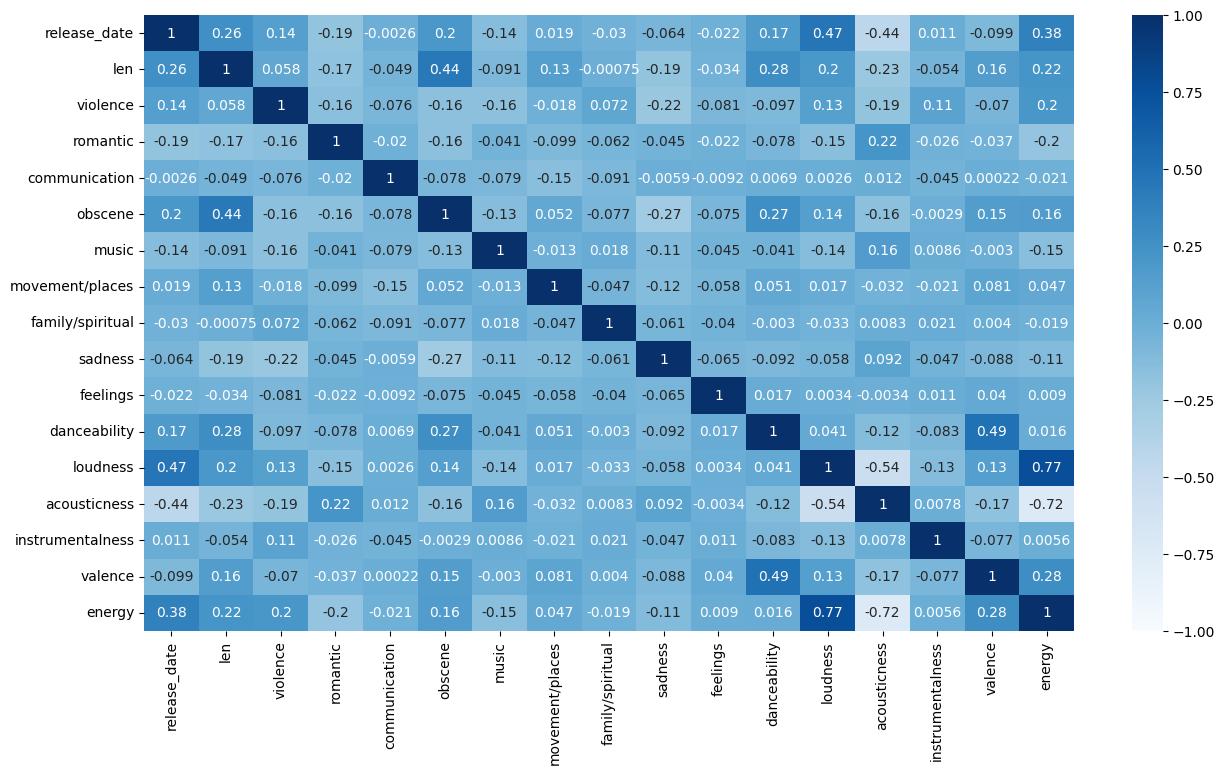

In [31]:
for_fig=clean_data.drop('lyrics','age','dating','world/life','family/gospel','like/girls','dating','night/time','shake the audience','family/gospel','light/visual perceptions','_c0')
# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = for_fig.toPandas()
# Calculate correlation matrix
corr_matrix = pandas_df.corr()

# Plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap="Blues")
plt.show()

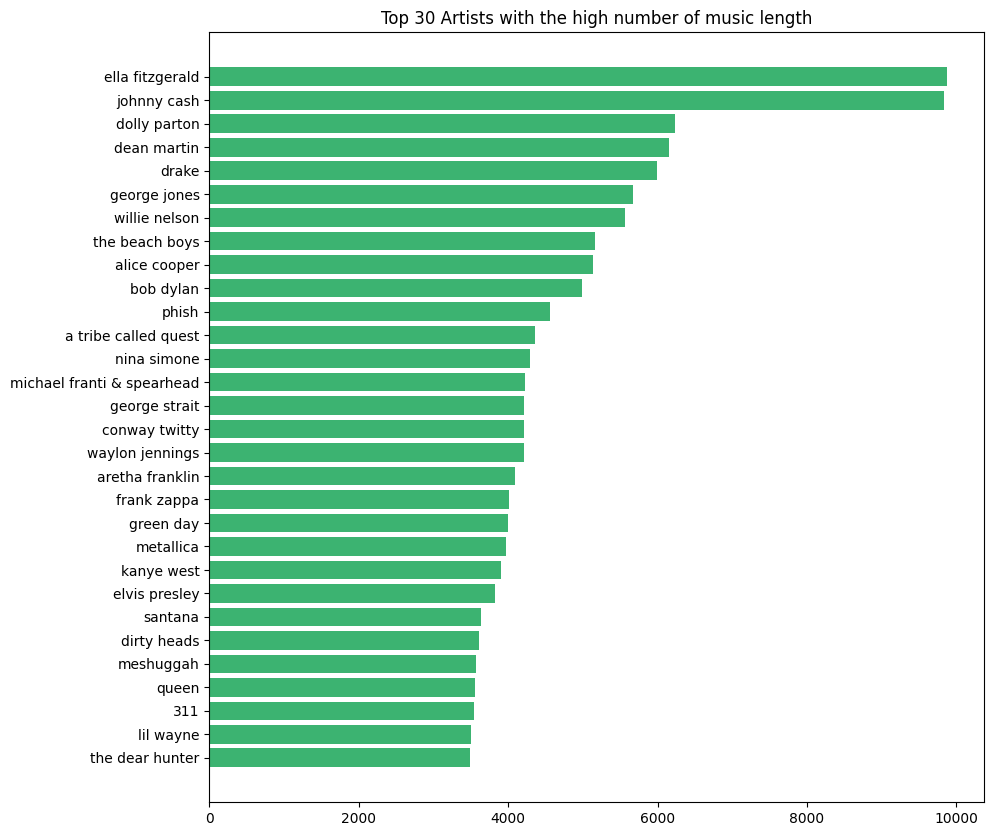

In [61]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Grouping the dataset by artistName and calculating the sum of minutes played
artist_length = clean_data.groupby('artist_name').agg(F.sum('len').alias('len'))

# Counting the number of unique trackNames per artist
artist_song_cnt = clean_data.groupby('artist_name').agg(F.countDistinct('track_name').alias('track_name'))

# Merging artist_length and artist_song_cnt
artist_length_uniqsong = artist_length.join(artist_song_cnt, on='artist_name', how='left')

# Sorting the DataFrame by minutes played
max_time = artist_length_uniqsong.sort(F.col('len').asc())

# Selecting the top 30 artists (tail because the DataFrame is sorted in ascending order of minutes played)
most_heard_30 = max_time.tail(30)
most_heard_30 = spark.createDataFrame(most_heard_30)
# Converting the PySpark DataFrame to a Pandas DataFrame
most_heard_30 = most_heard_30.toPandas()

# Plotting the bar chart
plt.rcParams["figure.figsize"] = (10, 10)
plt.barh(most_heard_30['artist_name'], most_heard_30['len'], color='mediumseagreen')
plt.title('Top 30 Artists with the high number of music length')
plt.show()


<Figure size 1000x400 with 0 Axes>

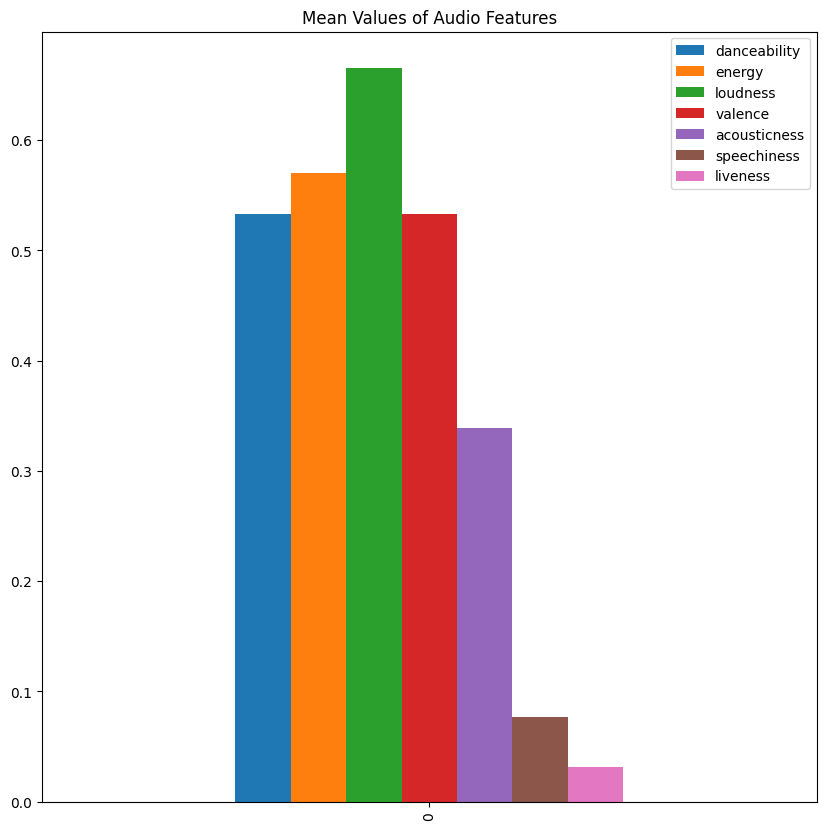

In [78]:
small = clean_data.select('danceability', 'energy', 'communication', 'acousticness', 'feelings', 'valence','loudness',)

# Calculate the mean values of the audio features
means = small.agg(F.mean('danceability').alias('danceability'),
                  F.mean('energy').alias('energy'),
                  F.mean('loudness').alias('loudness'),
                  F.mean('valence').alias('valence'),
                  F.mean('acousticness').alias('acousticness'),
                  F.mean('communication').alias('speechiness'),
                  F.mean('feelings').alias('liveness'),
                  )

# Convert the result to a Pandas DataFrame
means_pd = means.toPandas()

# Plot the bar chart
plt.figure(figsize=(10,4))
means_pd.plot.bar()
plt.title('Mean Values of Audio Features')
plt.show()

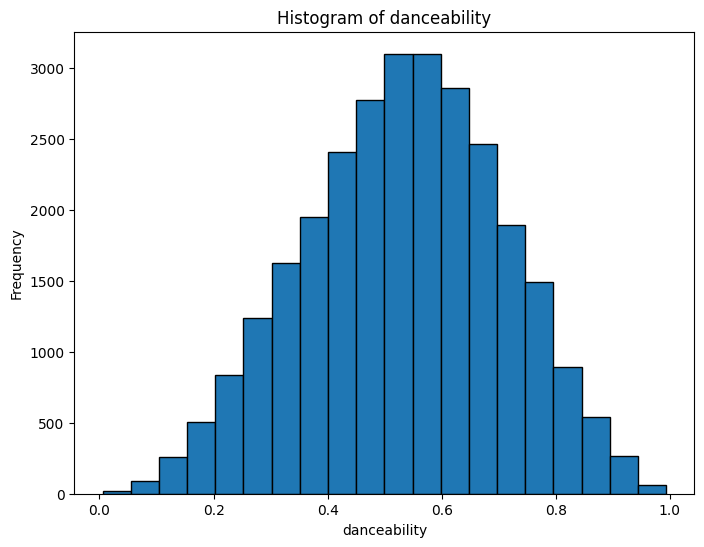

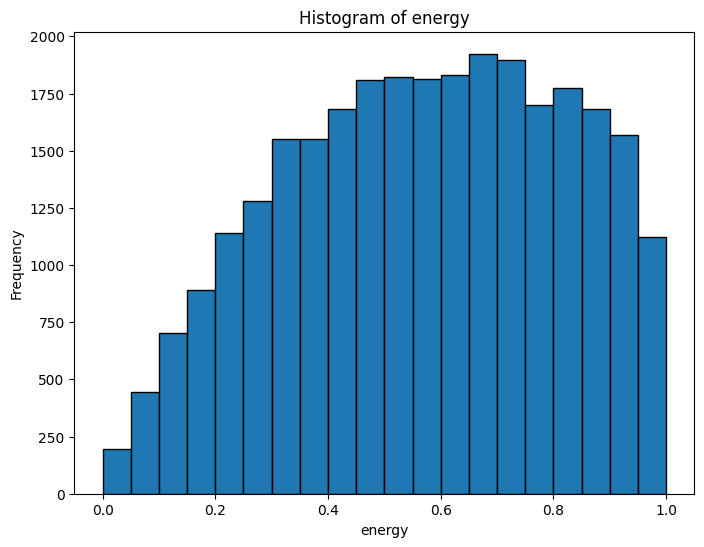

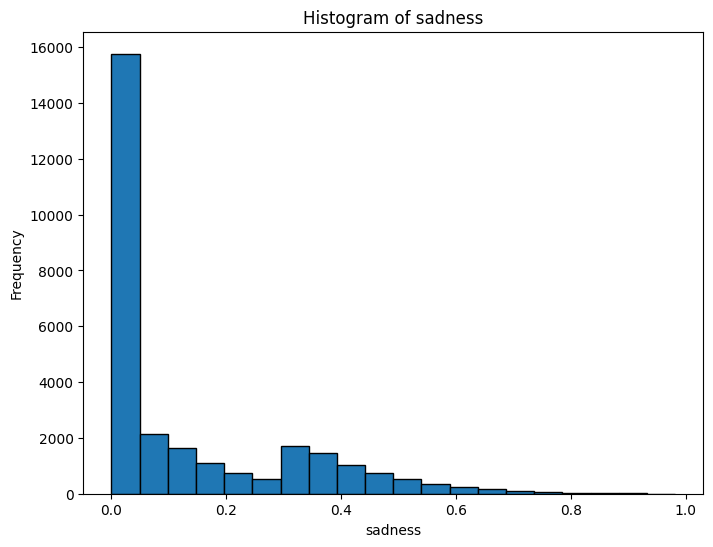

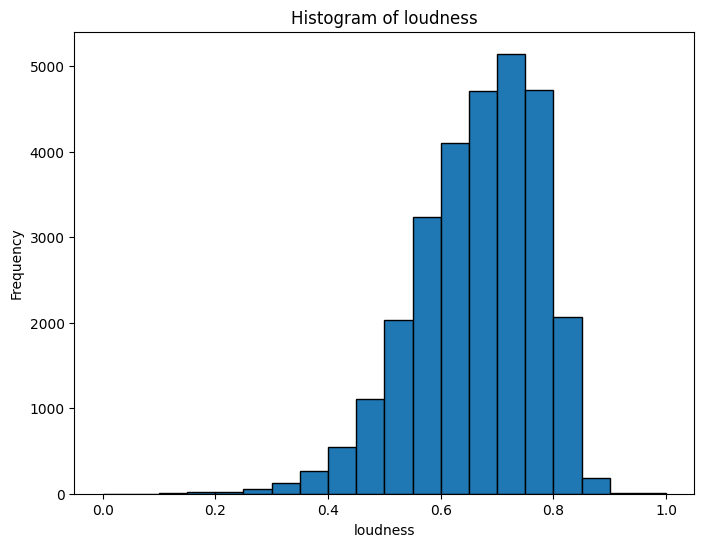

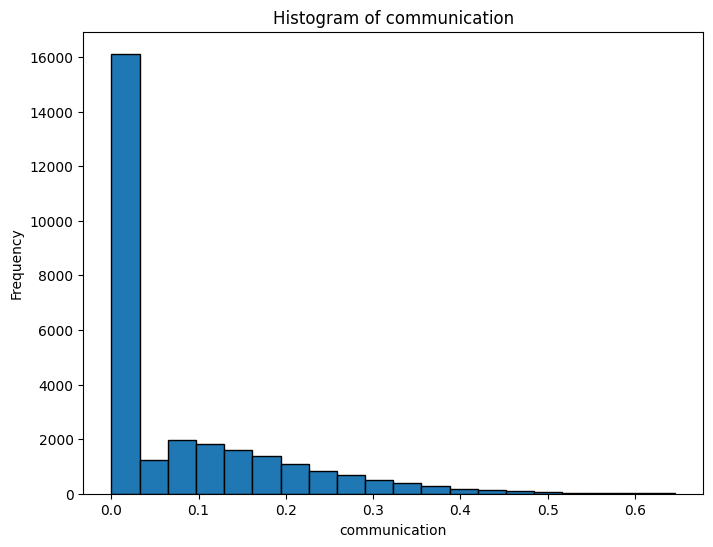

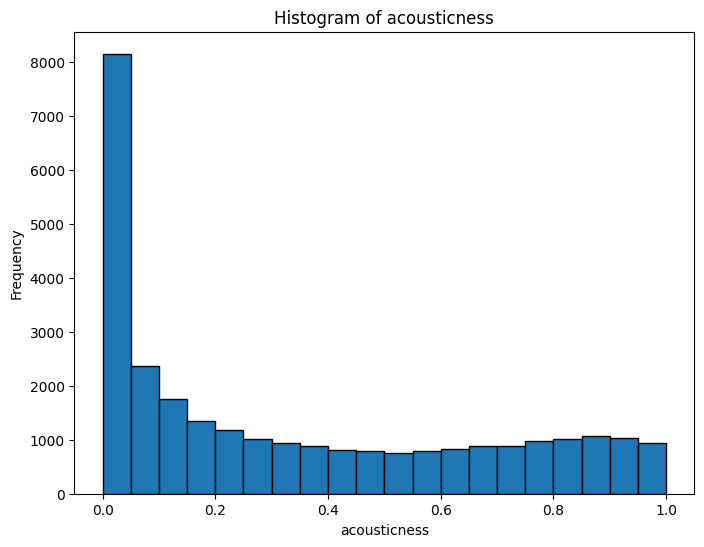

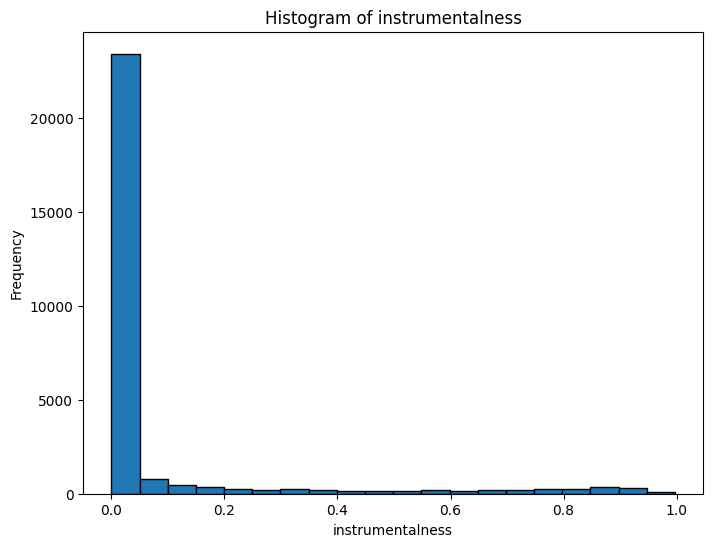

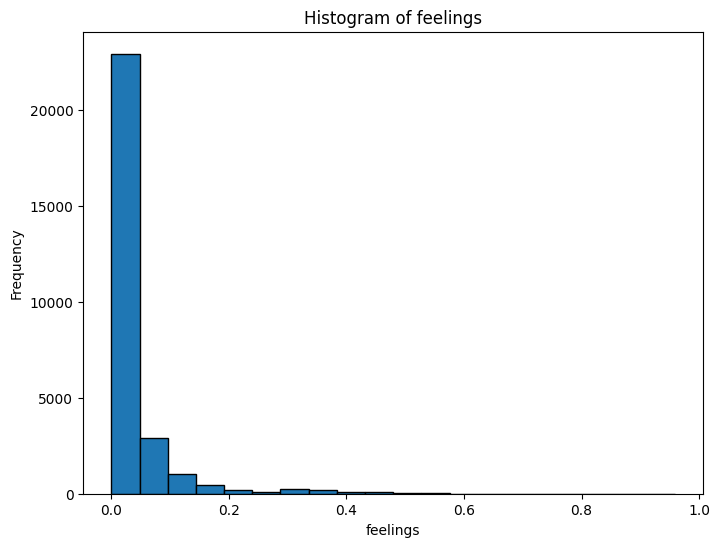

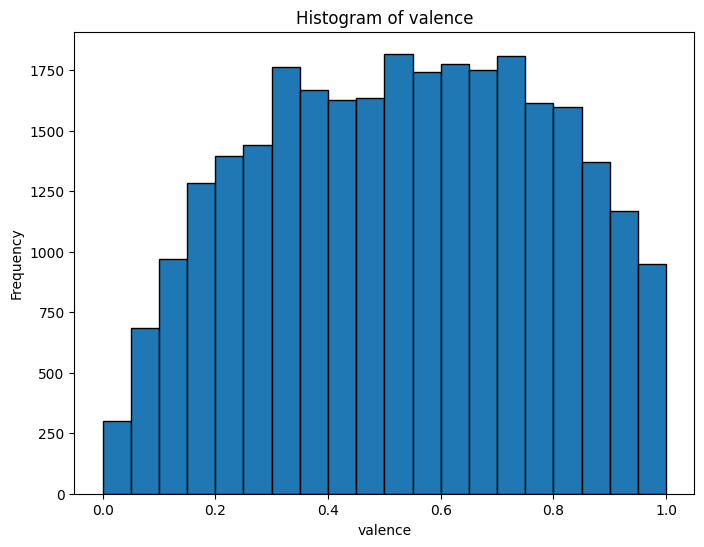

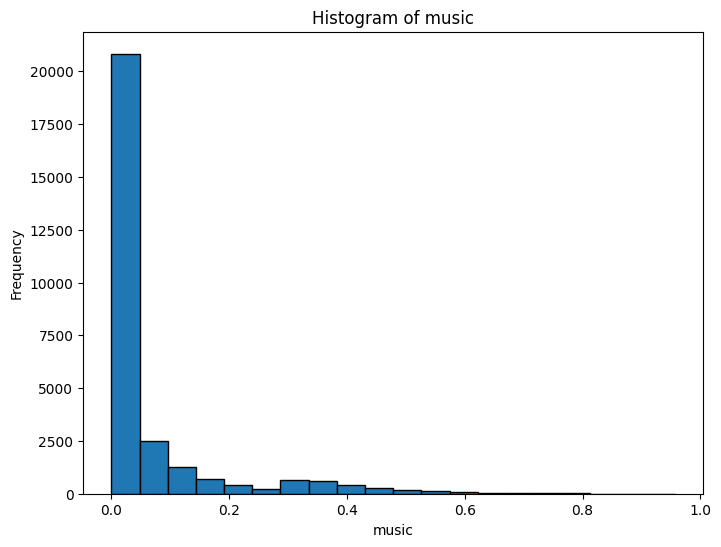

In [84]:
features = ['danceability', 'energy', 'sadness', 'loudness', 'communication', 'acousticness', 'instrumentalness', 'feelings', 'valence', 'music']
# Loop through each feature
for col in features:
    # Extract the column from the DataFrame
    column_data = clean_data.select(col).toPandas()[col]
    # fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    # Plot histogram using matplotlib
    plt.figure(figsize=(8, 6))
    plt.hist(column_data, bins=20, edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()


<h1>***The set covers an array of unique song features. A heat map can be used to identify the degree to which there is an association between the song's components. This makes it easier to understand the distinctive qualities of music.***  </h1>


Heady map of song featurs


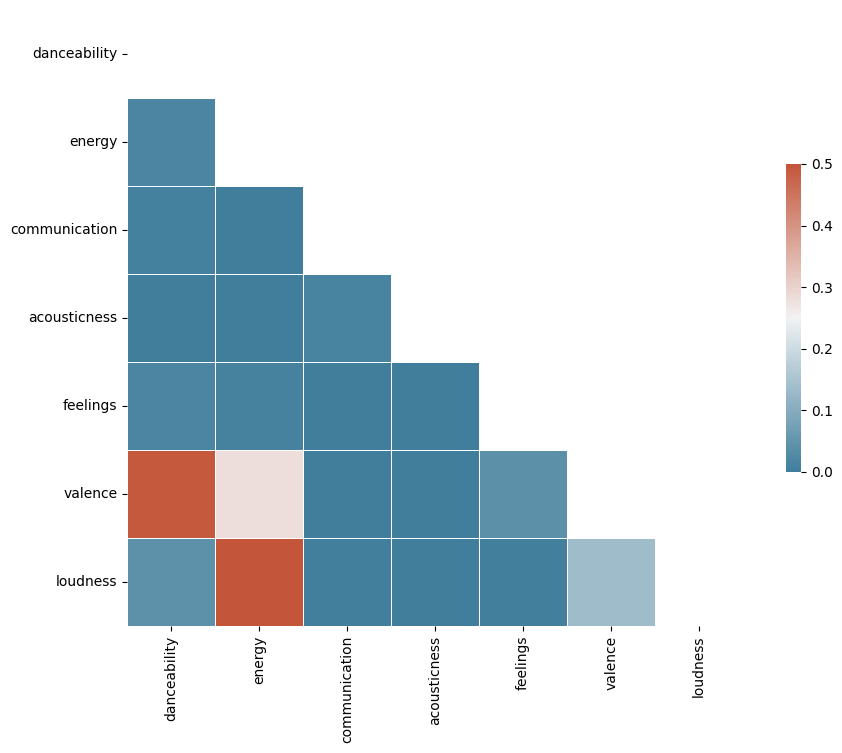

In [97]:

pandas_df = small.toPandas()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(pandas_df.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(pandas_df.corr(), mask=mask, cmap=cmap, vmin=0, vmax=.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Display the plot
plt.show()

In [123]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import ClusteringEvaluator

In [155]:
from pyspark.ml.feature import VectorAssembler

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Reading the dataset
# df = spark.read.csv('data/dataset.csv', header=True, inferSchema=True)

# Dropping extra columns
clean_data  = clean_data.drop('Unnamed: 0', 'datetime', 'id')

# Selecting required columns
selected_columns = ['danceability', 'energy', 'loudness', 'communication', 'acousticness','feelings', 'valence']
selected_data = df.select(*selected_columns)

# Convert the selected columns to a vector column
assembler = VectorAssembler(inputCols=selected_columns, outputCol='features')
vector_data = assembler.transform(selected_data)

# Show the resulting DataFrame
vector_data.show()


+-------------------+-------------------+-------------------+--------------------+-------------------+--------------------+-------------------+--------------------+
|       danceability|             energy|           loudness|       communication|       acousticness|            feelings|            valence|            features|
+-------------------+-------------------+-------------------+--------------------+-------------------+--------------------+-------------------+--------------------+
|0.35773854651792486|0.13711018802589228|0.45411891392969767|  0.2637508813174463| 0.9979919658553876| 0.11717545142309628|0.33944765045342123|[0.35773854651792...|
|0.33174482833315283| 0.2632402533492537|   0.64753993282568|0.001283697122283...| 0.9548192317462166|0.001283697175168...| 0.3250206100577081|[0.33174482833315...|
|0.45629806130185213|0.13911225255483453|  0.585288311155552| 0.25066790992061416| 0.8403612855032989| 0.22542232330826406|0.35181368507831823|[0.45629806130185...|
| 0.686992

standarizing the variable

In [156]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml import Pipeline

# Create a StandardScaler object
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")

# Fit the scaler to the data and transform
scaler_model = scaler.fit(vector_data)
scaled_data = scaler_model.transform(vector_data)

# Show the scaled data
scaled_data.show()


+-------------------+-------------------+-------------------+--------------------+-------------------+--------------------+-------------------+--------------------+--------------------+
|       danceability|             energy|           loudness|       communication|       acousticness|            feelings|            valence|            features|      scaledFeatures|
+-------------------+-------------------+-------------------+--------------------+-------------------+--------------------+-------------------+--------------------+--------------------+
|0.35773854651792486|0.13711018802589228|0.45411891392969767|  0.2637508813174463| 0.9979919658553876| 0.11717545142309628|0.33944765045342123|[0.35773854651792...|[2.06525053153750...|
|0.33174482833315283| 0.2632402533492537|   0.64753993282568|0.001283697122283...| 0.9548192317462166|0.001283697175168...| 0.3250206100577081|[0.33174482833315...|[1.91518691435040...|
|0.45629806130185213|0.13911225255483453|  0.585288311155552| 0.250667

**Dimensionality Reduction**

In [162]:
import pyspark_dist_explore as pde
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np

# Convert the scaled_data DataFrame to Pandas
pandas_df = scaled_data.select("scaledFeatures").toPandas()

# Extract values from the DenseVector column and convert to NumPy array
pandas_df['scaledFeatures'] = pandas_df['scaledFeatures'].apply(lambda x: np.array(x.toArray()))

# Convert the list of arrays to a NumPy array
X_tsne = np.array(pandas_df['scaledFeatures'].tolist())

# Perform t-SNE analysis
tsne = TSNE(learning_rate=100)
X_tsne = tsne.fit_transform(X_tsne)

# Convert the result back to a PySpark DataFrame
tsne_data = spark.createDataFrame(pd.DataFrame(X_tsne, columns=['TSNE_1', 'TSNE_2']))

# Show the t-SNE data
tsne_data.show()


+------------------+-------------------+
|            TSNE_1|             TSNE_2|
+------------------+-------------------+
|36.301143646240234|  32.04777908325195|
| 38.31107711791992| 1.3632307052612305|
| 39.56516647338867| 11.645224571228027|
|-33.68971633911133|-24.297109603881836|
| 35.55935287475586|  3.130119800567627|
|11.716920852661133|-33.428863525390625|
|22.406471252441406|  36.35382843017578|
| 46.29731369018555| -5.574345111846924|
|22.426973342895508| 14.645236015319824|
|25.396339416503906|  8.272852897644043|
|30.726470947265625|   8.48471736907959|
| 39.85651779174805| 21.837797164916992|
|32.664161682128906| 17.923633575439453|
|17.000694274902344| 11.381409645080566|
|6.2793049812316895|-30.709758758544922|
|-0.474029541015625|-34.161109924316406|
|30.856508255004883| -16.48250389099121|
|35.803810119628906| -30.53024673461914|
| 33.62934494018555| 36.602176666259766|
|16.003376007080078|  -47.0265007019043|
+------------------+-------------------+
only showing top

ValueError: ignored

In [160]:
import pyspark_dist_explore as pde
from sklearn.manifold import TSNE
import pandas as pd

# Convert the scaled_data DataFrame to Pandas
pandas_df = scaled_data.select("scaledFeatures").toPandas()

# Perform t-SNE analysis
X_tsne = TSNE(learning_rate=100).fit_transform(pandas_df)

# Convert the result back to a PySpark DataFrame
tsne_data = spark.createDataFrame(pd.DataFrame(X_tsne, columns=['TSNE_1', 'TSNE_2']))

# Show the t-SNE data
tsne_data.show()


ValueError: ignored

In [126]:
from sklearn import preprocessing

# scale the data for better results
x_scaled = preprocessing.scale(x)

In [127]:
# Assemble the features into a single column
assembler = VectorAssembler(inputCols=cols, outputCol="features")
assembled_train = assembler.transform(train_data)

In [128]:
# Assemble the features into a single column for validation set
assembled_val = assembler.transform(val_data)

In [129]:
# Train KMeans clustering model
kmeans = KMeans(k=5, seed=42)
model = kmeans.fit(assembled_train)

In [130]:
# Make predictions on validation set
predictions = model.transform(assembled_val)

In [131]:
# Evaluate the model
evaluator = ClusteringEvaluator()
silhouette_score = evaluator.evaluate(predictions)
print(f"Silhouette score on validation set: {silhouette_score:.3f}")

Silhouette score on validation set: 0.511


In [132]:
# Make predictions on training set
predictions_train = model.transform(assembled_train)

In [133]:
# Evaluate the model on training set
silhouette_score_train = evaluator.evaluate(predictions_train)
print(f"Silhouette score on training set: {silhouette_score_train:.3f}")

Silhouette score on training set: 0.516
